# Read data from csv file

In [2]:
import numpy as np
import pandas as pd

In [3]:
dataAuto = pd.read_csv("AutoDSE.csv")

In [4]:
dataAuto

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,13.0,8,360,175,3821,11.0
1,15.0,8,390,190,3850,8.5
2,17.0,8,304,150,3672,11.5
3,19.4,6,232,90,3210,17.2
4,24.3,4,151,90,3003,20.1
5,18.1,6,258,120,3410,15.1
6,20.2,6,232,90,3265,18.2
7,21.0,6,199,90,2648,15.0
8,19.0,6,232,100,2634,13.0
9,18.0,6,232,100,2789,15.0


In [7]:
type(dataAuto)

pandas.core.frame.DataFrame

In [97]:
# dataAuto.head(2)


In [9]:
# dataAuto.info()

In [10]:
# dataAuto = dataAuto[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]]

# Correlation, Plots

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


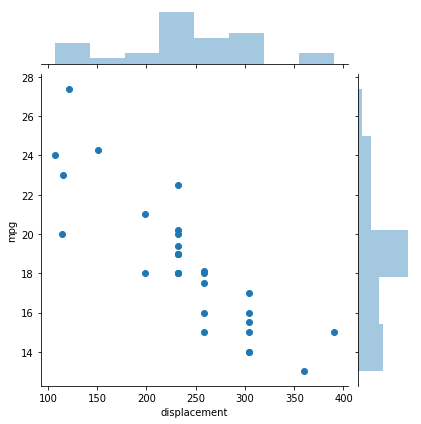

In [12]:
sns.jointplot(dataAuto.displacement, dataAuto.mpg )

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


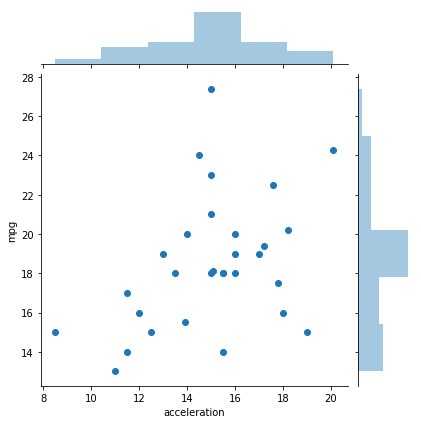

In [13]:
sns.jointplot(dataAuto.acceleration, dataAuto.mpg )

In [14]:
dataAuto.displacement.corr(dataAuto.mpg)

-0.8577514485555104

In [15]:
dataAuto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.847092,-0.857751,-0.749640,-0.777886,0.409395
cylinders,-0.847092,1.000000,0.940695,0.819409,0.808110,-0.547162
displacement,-0.857751,0.940695,1.000000,0.832935,0.826146,-0.484172
horsepower,-0.749640,0.819409,0.832935,1.000000,0.759247,-0.743887
weight,-0.777886,0.808110,0.826146,0.759247,1.000000,-0.244026
acceleration,0.409395,-0.547162,-0.484172,-0.743887,-0.244026,1.000000


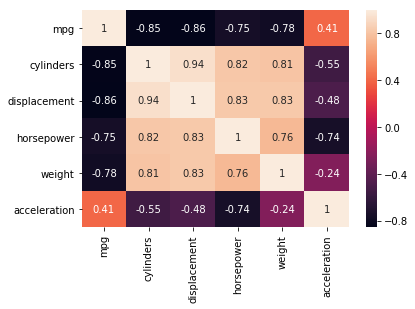

In [16]:
sns.heatmap(dataAuto.corr(), annot=True)

# Simple Linear Regression: mpg on displacement

In [17]:
import statsmodels.api as sm # Regression Library

In [18]:
from __future__ import print_function

In [19]:
from patsy import dmatrices

In [20]:
displ = dataAuto[['displacement']]

In [21]:
mpg = dataAuto[['mpg']]

In [22]:
from statsmodels.formula.api import ols
model1 = ols('mpg ~ displ', data=dataAuto).fit()

In [23]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     77.96
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           1.39e-09
Time:                        12:19:53   Log-Likelihood:                -58.493
No. Observations:                  30   AIC:                             121.0
Df Residuals:                      28   BIC:                             123.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.5089      1.179     24.188      0.0

In [24]:
mpgpred = model1.predict()
print(mpgpred)

[13.46968441 12.21642014 15.80911106 18.81694531 22.20075885 17.73078294
 18.81694531 20.19553602 18.81694531 18.81694531 18.81694531 20.19553602
 18.81694531 18.81694531 18.81694531 17.73078294 18.81694531 15.80911106
 17.73078294 17.73078294 15.80911106 15.80911106 15.80911106 18.81694531
 17.73078294 15.80911106 23.45402313 24.03887979 23.74645146 23.70467598]


In [25]:
dataAuto['mpgPred'] = mpgpred

In [26]:
dataAuto['res'] = dataAuto.mpg - dataAuto.mpgPred

In [27]:
print(dataAuto)

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   13.0          8           360         175    3821          11.0   
1   15.0          8           390         190    3850           8.5   
2   17.0          8           304         150    3672          11.5   
3   19.4          6           232          90    3210          17.2   
4   24.3          4           151          90    3003          20.1   
5   18.1          6           258         120    3410          15.1   
6   20.2          6           232          90    3265          18.2   
7   21.0          6           199          90    2648          15.0   
8   19.0          6           232         100    2634          13.0   
9   18.0          6           232         100    2789          15.0   
10  20.0          6           232         100    2914          16.0   
11  18.0          6           199          97    2774          15.5   
12  18.0          6           232         100    2945          16.0   
13  19

In [43]:
dataAuto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,mpgPred,res
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,18.496667,6.200000,239.666667,112.433333,3217.633333,15.013333,18.496667,1.355952e-14
std,3.364160,1.323527,69.074339,28.724234,485.351169,2.594122,2.885613,1.729396e+00
min,13.000000,4.000000,107.000000,80.000000,2430.000000,8.500000,12.216420,-3.746451e+00
25%,16.000000,6.000000,232.000000,90.250000,2817.000000,13.600000,16.289529,-8.169453e-01
50%,18.000000,6.000000,232.000000,100.000000,3201.500000,15.050000,18.816945,7.208745e-02
75%,20.000000,7.500000,292.500000,120.000000,3662.000000,16.750000,18.816945,7.491117e-01
max,27.400000,8.000000,390.000000,190.000000,4257.000000,20.100000,24.038880,3.945977e+00


In [28]:
newData = {'displ': [350, 300, 250]}
newData = pd.DataFrame(data=newData)

In [29]:
mpgnewpred =  model1.predict(newData) # predict out of sample
print(mpgnewpred)

0    13.887439
1    15.976213
2    18.064987
dtype: float64


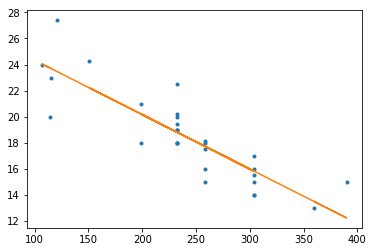

In [44]:
import matplotlib.pyplot as plt

plt.plot(displ, mpg, '.')
plt.plot(displ, mpgpred, '-')
plt.show()

In [31]:
from statsmodels.stats.api import anova_lm

In [74]:
aov_table = sm.stats.anova_lm(model1)

In [75]:
print(aov_table)

            df      sum_sq     mean_sq          F        PR(>F)
displ      1.0  241.476175  241.476175  77.955272  1.394943e-09
Residual  28.0   86.733491    3.097625        NaN           NaN


# SLR: mpg on horsepower, weight, acceleration

In [34]:
hp = dataAuto[['horsepower']]
model2 = ols('mpg ~ hp', data=dataAuto).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     35.92
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           1.86e-06
Time:                        12:19:59   Log-Likelihood:                -66.073
No. Observations:                  30   AIC:                             136.1
Df Residuals:                      28   BIC:                             138.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.3680      1.698     16.705      0.0

In [53]:
mpghppred=model2.predict()

In [56]:
dataAuto['mpghppred']= mpghppred

In [57]:
dataAuto['hpres']= dataAuto.mpg - dataAuto.mpghppred

In [58]:
print(dataAuto)

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   13.0          8           360         175    3821          11.0   
1   15.0          8           390         190    3850           8.5   
2   17.0          8           304         150    3672          11.5   
3   19.4          6           232          90    3210          17.2   
4   24.3          4           151          90    3003          20.1   
5   18.1          6           258         120    3410          15.1   
6   20.2          6           232          90    3265          18.2   
7   21.0          6           199          90    2648          15.0   
8   19.0          6           232         100    2634          13.0   
9   18.0          6           232         100    2789          15.0   
10  20.0          6           232         100    2914          16.0   
11  18.0          6           199          97    2774          15.5   
12  18.0          6           232         100    2945          16.0   
13  19

In [96]:
wt = dataAuto[['weight']]
model3 = ols('mpg ~ wt', data=dataAuto).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     42.91
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           4.22e-07
Time:                        14:51:40   Log-Likelihood:                -64.518
No. Observations:                  30   AIC:                             133.0
Df Residuals:                      28   BIC:                             135.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.8456      2.678     13.387      0.0

In [60]:
wtpre=model3.predict()

In [61]:
dataAuto['wtpre']=wtpre

In [62]:
dataAuto['wtres']= dataAuto.mpg - dataAuto.wtpre

In [63]:
print(dataAuto)

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   13.0          8           360         175    3821          11.0   
1   15.0          8           390         190    3850           8.5   
2   17.0          8           304         150    3672          11.5   
3   19.4          6           232          90    3210          17.2   
4   24.3          4           151          90    3003          20.1   
5   18.1          6           258         120    3410          15.1   
6   20.2          6           232          90    3265          18.2   
7   21.0          6           199          90    2648          15.0   
8   19.0          6           232         100    2634          13.0   
9   18.0          6           232         100    2789          15.0   
10  20.0          6           232         100    2914          16.0   
11  18.0          6           199          97    2774          15.5   
12  18.0          6           232         100    2945          16.0   
13  19

In [36]:
acc = dataAuto[['acceleration']]
model4 = ols('mpg ~ acc', data=dataAuto).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     5.638
Date:                Mon, 29 Oct 2018   Prob (F-statistic):             0.0247
Time:                        12:20:00   Log-Likelihood:                -75.703
No. Observations:                  30   AIC:                             155.4
Df Residuals:                      28   BIC:                             158.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5258      3.405      3.091      0.0

In [64]:
accpre=model4.predict()

In [65]:
dataAuto['accpre']=accpre

In [66]:
dataAuto['accres']= dataAuto.mpg - dataAuto.accpre

In [68]:
print(dataAuto)

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   13.0          8           360         175    3821          11.0   
1   15.0          8           390         190    3850           8.5   
2   17.0          8           304         150    3672          11.5   
3   19.4          6           232          90    3210          17.2   
4   24.3          4           151          90    3003          20.1   
5   18.1          6           258         120    3410          15.1   
6   20.2          6           232          90    3265          18.2   
7   21.0          6           199          90    2648          15.0   
8   19.0          6           232         100    2634          13.0   
9   18.0          6           232         100    2789          15.0   
10  20.0          6           232         100    2914          16.0   
11  18.0          6           199          97    2774          15.5   
12  18.0          6           232         100    2945          16.0   
13  19

In [69]:
dataAuto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,mpgPred,res,hppredict,mpghppred,hpres,wtpre,wtres,accpre,accres
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,3.000000e+01,30.000000,3.000000e+01,30.000000,3.000000e+01
mean,18.496667,6.200000,239.666667,112.433333,3217.633333,15.013333,18.496667,1.355952e-14,18.496667,18.496667,-4.381680e-15,18.496667,3.789561e-15,18.496667,-1.657933e-15
std,3.364160,1.323527,69.074339,28.724234,485.351169,2.594122,2.885613,1.729396e+00,2.521908,2.521908,2.226556e+00,2.616935,2.114055e+00,1.377269,3.069317e+00
min,13.000000,4.000000,107.000000,80.000000,2430.000000,8.500000,12.216420,-3.746451e+00,11.686528,11.686528,-3.710307e+00,12.892570,-2.888666e+00,15.038614,-5.613264e+00
25%,16.000000,6.000000,232.000000,90.250000,2817.000000,13.600000,16.289529,-8.169453e-01,17.832334,17.832334,-1.557772e+00,16.100714,-1.740111e+00,17.746301,-1.876844e+00
50%,18.000000,6.000000,232.000000,100.000000,3201.500000,15.050000,18.816945,7.208745e-02,19.588279,19.588279,-4.833665e-01,18.583655,-1.255347e-01,18.516134,-3.501447e-01
75%,20.000000,7.500000,292.500000,120.000000,3662.000000,16.750000,18.816945,7.491117e-01,20.444302,20.444302,7.346243e-01,20.656817,1.000929e+00,19.418696,1.424061e+00
max,27.400000,8.000000,390.000000,190.000000,4257.000000,20.100000,24.038880,3.945977e+00,21.344224,21.344224,6.055776e+00,22.743458,5.950583e+00,21.197275,8.910412e+00


In [77]:
Total = dataAuto['accres'].sum()
print (Total)

-4.973799150320701e-14


# Multiple Regression: mpg on several predictors

In [105]:
model5 = ols('mpg ~ horsepower + weight', data=dataAuto).fit()

In [79]:
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     26.78
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           3.90e-07
Time:                        14:38:53   Log-Likelihood:                -62.059
No. Observations:                  30   AIC:                             130.1
Df Residuals:                      27   BIC:                             134.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.4319      2.593     13.276      0.0

In [80]:
model6 = ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration', data=dataAuto).fit()

In [81]:
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     15.47
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           7.80e-07
Time:                        14:38:55   Log-Likelihood:                -56.849
No. Observations:                  30   AIC:                             125.7
Df Residuals:                      24   BIC:                             134.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       34.7116      6.111      5.680   

In [82]:
aov_table = sm.stats.anova_lm(model6)
print(aov_table)

                df      sum_sq     mean_sq          F        PR(>F)
cylinders      1.0  235.511504  235.511504  72.714666  1.001181e-08
displacement   1.0   10.575205   10.575205   3.265117  8.332208e-02
horsepower     1.0    0.571032    0.571032   0.176307  6.783012e-01
weight         1.0    3.196353    3.196353   0.986881  3.304169e-01
acceleration   1.0    0.623302    0.623302   0.192446  6.648127e-01
Residual      24.0   77.732270    3.238845        NaN           NaN


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
variables = model6.model.exog

In [85]:
# print(variables)

In [86]:
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[345.9420912199532,
 11.706394477806285,
 11.691038845961174,
 13.06078573563366,
 7.698477513902379,
 6.293073096478749]

In [98]:
model6 = ols('mpg ~ cylinders + displacement + weight + acceleration', data=dataAuto).fit()
variables = model6.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[147.16516449157416,
 10.473071504495875,
 9.759287858440608,
 3.816267608085418,
 1.7036839467429246]

In [99]:
model6 = ols('mpg ~ displacement + weight + acceleration', data=dataAuto).fit()
variables = model6.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[106.99667940575101, 4.299587431482782, 3.5000928814575283, 1.451477898671339]

In [100]:
model6 = ols('mpg ~ weight + acceleration', data=dataAuto).fit()
variables = model6.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[106.78577806011681, 1.0633191604312853, 1.0633191604312857]

In [106]:
model7 = ols('mpg ~ weight + acceleration', data=dataAuto).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     25.79
Date:                Tue, 30 Oct 2018   Prob (F-statistic):           5.46e-07
Time:                        14:32:52   Log-Likelihood:                -62.432
No. Observations:                  30   AIC:                             130.9
Df Residuals:                      27   BIC:                             135.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       30.0293      3.856      7.788   

# Fitted Data?

In [102]:
model7.predict()

array([14.26653832, 13.36468403, 15.16246981, 19.19688296, 21.10930203,
       17.56166425, 19.22482902, 21.33904855, 20.80345098, 20.63448117,
       20.312642  , 20.8608238 , 20.15773712, 20.37760212, 19.94261036,
       19.31584601, 18.29240086, 15.16246981, 17.33039958, 17.14347758,
       14.44002513, 14.36592213, 13.45037394, 19.13133056, 19.46349718,
       16.50812517, 21.22911605, 22.27699103, 21.36606874, 21.10918969])

In [103]:
mpgres7 = model7.resid
print(mpgres7)

0    -1.266538
1     1.635316
2     1.837530
3     0.203117
4     3.190698
5     0.538336
6     0.975171
7    -0.339049
8    -1.803451
9    -2.634481
10   -0.312642
11   -2.860824
12   -2.157737
13   -1.377602
14    2.557390
15   -1.315846
16   -0.292401
17   -1.162470
18   -1.330400
19   -2.143478
20    1.059975
21    0.634078
22    0.549626
23   -0.131331
24   -1.963497
25   -0.508125
26    6.170884
27    1.723009
28   -1.366069
29    1.890810
dtype: float64


# Transformation

In [88]:
dataAuto['invmpg'] = 1/dataAuto.mpg
dataAuto

,mpg,cylinders,displacement,horsepower,weight,acceleration,mpgPred,res,hppredict,mpghppred,hpres,wtpre,wtres,accpre,accres,invmpg
0,13.0,8,360,175,3821,11.0,13.469684,-0.469684,13.003486,13.003486,-0.003486,15.243412,-2.243412,16.365911,-3.365911,0.076923
1,15.0,8,390,190,3850,8.5,12.216420,2.783580,11.686528,11.686528,3.313472,15.087048,-0.087048,15.038614,-0.038614,0.066667
2,17.0,8,304,150,3672,11.5,15.809111,1.190889,15.198417,15.198417,1.801583,16.046795,0.953205,16.631371,0.368629,0.058824
3,19.4,6,232,90,3210,17.2,18.816945,0.583055,20.466251,20.466251,-1.066251,18.537824,0.862176,19.657610,-0.257610,0.051546
4,24.3,4,151,90,3003,20.1,22.200759,2.099241,20.466251,20.466251,3.833749,19.653935,4.646065,21.197275,3.102725,0.041152
5,18.1,6,258,120,3410,15.1,17.730783,0.369217,17.832334,17.832334,0.267666,17.459457,0.640543,18.542680,-0.442680,0.055249
6,20.2,6,232,90,3265,18.2,18.816945,1.383055,20.466251,20.466251,-0.266251,18.241273,1.958727,20.188529,0.011471,0.049505
7,21.0,6,199,90,2648,15.0,20.195536,0.804464,20.466251,20.466251,0.533749,21.568037,-0.568037,18.489588,2.510412,0.047619
8,19.0,6,232,100,2634,13.0,18.816945,0.183055,19.588279,19.588279,-0.588279,21.643523,-2.643523,17.427750,1.572250,0.052632
9,18.0,6,232,100,2789,15.0,18.816945,-0.816945,19.588279,19.588279,-1.588279,20.807788,-2.807788,18.489588,-0.489588,0.055556


In [89]:
model8 = ols('invmpg ~ weight + acceleration', data=dataAuto).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                 invmpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     41.13
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           6.38e-09
Time:                        14:38:59   Log-Likelihood:                 117.83
No. Observations:                  30   AIC:                            -229.7
Df Residuals:                      27   BIC:                            -225.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0215      0.009      2.264   

# Residual Plot

In [107]:
mpgpred7 = model7.predict()
print(mpgpred7)

[14.26653832 13.36468403 15.16246981 19.19688296 21.10930203 17.56166425
 19.22482902 21.33904855 20.80345098 20.63448117 20.312642   20.8608238
 20.15773712 20.37760212 19.94261036 19.31584601 18.29240086 15.16246981
 17.33039958 17.14347758 14.44002513 14.36592213 13.45037394 19.13133056
 19.46349718 16.50812517 21.22911605 22.27699103 21.36606874 21.10918969]


In [108]:
mpgres7 = model7.resid
print(mpgres7)

0    -1.266538
1     1.635316
2     1.837530
3     0.203117
4     3.190698
5     0.538336
6     0.975171
7    -0.339049
8    -1.803451
9    -2.634481
10   -0.312642
11   -2.860824
12   -2.157737
13   -1.377602
14    2.557390
15   -1.315846
16   -0.292401
17   -1.162470
18   -1.330400
19   -2.143478
20    1.059975
21    0.634078
22    0.549626
23   -0.131331
24   -1.963497
25   -0.508125
26    6.170884
27    1.723009
28   -1.366069
29    1.890810
dtype: float64


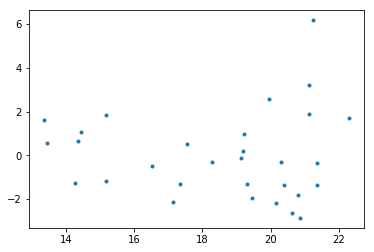

In [109]:
plt.plot(mpgpred7, mpgres7, '.')
plt.show()

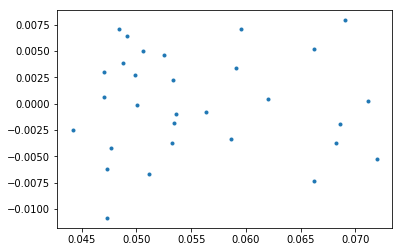

In [110]:
mpgpred8 = model8.predict()
mpgres8 = model8.resid
plt.plot(mpgpred8, mpgres8, '.')
plt.show()